<h1> Lab 1 </h1>


<h2> Alaa Mohamed Hamdy </h2>
<h2> 19P6621 </h2>


<h3> Step 1 : Import needed libraries and packages </h3>

In [13]:
import cv2
import matplotlib.pyplot as plt



<h3> Step 2: Load the 2 images we will operate on </h3>

In [15]:
# load the images
featureExtractionImage= cv2.imread("books.jpg")
featureMatchingImage= cv2.imread("zoomedbook.jpg")

<h3>Step 3: Convert the images to grayscale </h3>

In [3]:
# Convert the images to grayscale
gray1 = cv2.cvtColor(featureExtractionImage, cv2.COLOR_BGR2GRAY) #featureExtractionImage
gray2 = cv2.cvtColor(featureMatchingImage, cv2.COLOR_BGR2GRAY)  #featureMatchingImage

<h3> Step 4: Initialize the SIFT object detector</h3>

In [4]:
# Initialize SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

 <h3>Step 5: Detect keypoints and compute descriptor in both images </h3>

In [5]:
# Detect keypoints and compute descriptors
keypoints_E, descriptors_E = sift.detectAndCompute(gray1, None) #featureExtractionImage
keypoints_M, descriptors_M = sift.detectAndCompute(gray2, None) #featureMatchingImage

<h3>Step 6: Draw the keypoints of each image on the image itself </h3>


In [6]:
# Draw keypoints on the image
featureExtractionImage_with_keypoints = cv2.drawKeypoints(featureExtractionImage, keypoints_E, None)  #featureExtractionImage
featureMatchingImage_with_keypoints = cv2.drawKeypoints(featureMatchingImage, keypoints_M, None) #featureMatchingImage




<h3>Step 7: Plot the images </h3>

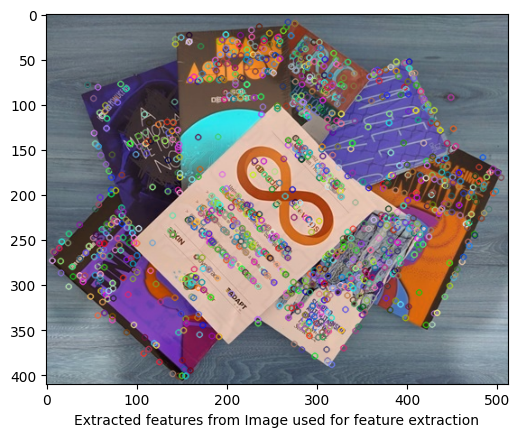

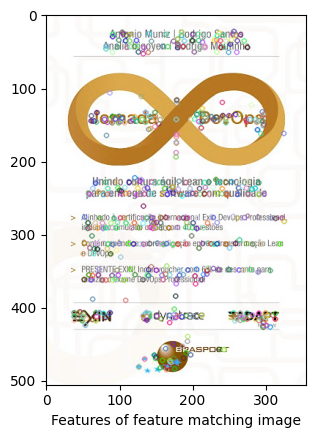

In [7]:
plt.imshow(featureExtractionImage_with_keypoints)
plt.xlabel('Extracted features from Image used for feature extraction')
plt.show()
plt.imshow(featureMatchingImage_with_keypoints)
plt.xlabel('Features of feature matching image')
plt.show()

<h3> Step 8: Initialize Brute-force matcher for feature matching </h3>

In [8]:
# Initialize Brute-Force matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)


<h3>Step 9: Match the computed descriptors of both images using Brute-force matcher </h3>

In [9]:
# Match descriptors using feature matcher
matches = bf.match(descriptors_E, descriptors_M)


<h3> Step 10: Sort matches by distance </h3>

In [10]:
# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

<h3>Step 11: Draw matched features on a new image </h3>

In [11]:
# Draw matches on a new image
matched_image = cv2.drawMatches(featureExtractionImage, keypoints_E, featureMatchingImage, keypoints_M, matches[:55], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

<h3>Step 12: Plot Matched Image </h3>

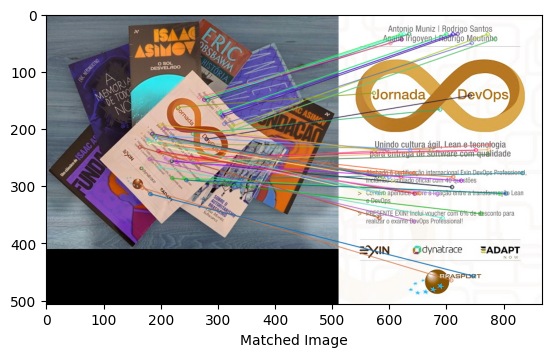

In [12]:
plt.imshow(matched_image)
plt.xlabel('Matched Image')
plt.show()
